In [19]:
import pandas as pd
import ast
import json

# Load your CSV
df = pd.read_csv("/Users/jaeeponde/dsm_project/philadelphia/philadelphia_restaurants_sampled.csv")

# Parse the 'attributes' column which is a string of dictionaries
def safe_parse(val):
    try:
        return ast.literal_eval(val)
    except:
        return {}

df['parsed_attributes'] = df['attributes'].apply(safe_parse)

# Expand nested dictionaries in 'attributes'
attributes_df = df['parsed_attributes'].apply(pd.Series)

# Handle nested dictionaries in columns like 'Ambience', 'BusinessParking', etc.
for col in attributes_df.columns:
    if attributes_df[col].apply(lambda x: isinstance(x, str)).any():
        try:
            attributes_df[col] = attributes_df[col].apply(safe_parse)
        except:
            pass

nested_cols = [col for col in attributes_df.columns if attributes_df[col].apply(lambda x: isinstance(x, dict)).any()]
for col in nested_cols:
    expanded = attributes_df[col].apply(pd.Series)
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    attributes_df = attributes_df.drop(columns=col).join(expanded)


attributes_df = attributes_df.dropna(axis=1, how='all')
attributes_df

,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast,Caters_0,RestaurantsTakeOut_0,RestaurantsPriceRange2_0,BusinessAcceptsCreditCards_0,...,BYOBCorkage_0,ByAppointmentOnly_0,GoodForDancing_0,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday
0,False,False,False,False,False,False,True,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,None,True,None,True,None,NaN,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,False,False,True,False,True,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,False,False,NaN,True,2.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,True,True,None,False,True,True,2.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,NaN,NaN,NaN,NaN,NaN,NaN,True,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,False,False,True,True,False,False,False,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,NaN,NaN,NaN,NaN,NaN,NaN,True,True,1.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Convert categories to dummy variables (multi-label)
df['categories'] = df['categories'].fillna('').apply(lambda x: [cat.strip() for cat in x.split(',')])
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
categories_df = pd.DataFrame(mlb.fit_transform(df['categories']), columns=mlb.classes_)


In [21]:
categories_df

,Acai Bowls,Active Life,Afghan,African,American (New),American (Traditional),Arcades,Art Galleries,Arts & Crafts,Arts & Entertainment,...,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Whiskey Bars,Wine & Spirits,Wine Bars,Wraps
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = pd.concat([attributes_df, categories_df, df[['review_count']]], axis=1)
y = df['stars']

# Convert boolean and categorical strings to actual numeric values
X = X.replace({'True': 1, 'False': 0, 'None': None, 'none': None, 'u\'none\'': None, 'u\'casual\'': 'casual'})
X = pd.get_dummies(X, dummy_na=True)
X = X.fillna(0)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 0.7155669372369483
R2 Score: 0.030336796422935186


/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


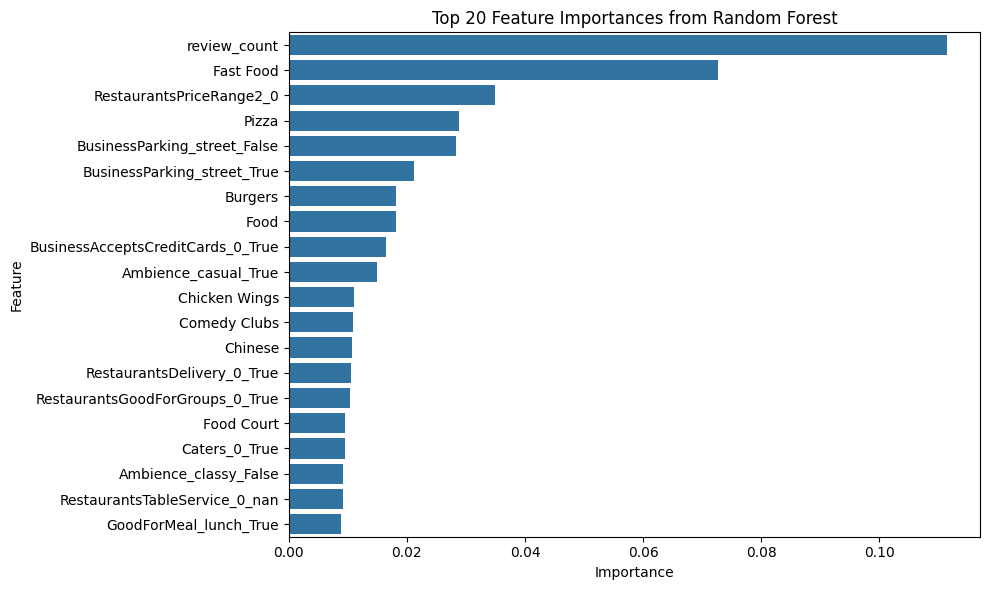

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_model is your trained model and X_train was used to fit it
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display top features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20])
plt.title("Top 20 Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Step 1: Define the features based on the provided attributes and set them to the specified values.
# We'll use 'True' (1) and 'False' (0) for binary features.
data_point = {
    'GoodForMeal_dessert_False': 1,  # Set to False (0)
    'HasTV_False': 1,  # Set to False (0)
    'Ambience_casual_True': 1,  # Set to True (1)
    'DogsAllowed_False': 1,  # Set to False (0)
    'GoodForMeal_lunch_True': 1,  # Set to True (1)
    'WheelchairAccessible_False': 1,  # Set to False (0)
    'RestaurantsTableService_True': 1,  # Set to True (1)
    'Ambience_classy_True': 1,  # Set to True (1)
    'OutdoorSeating_True': 1,  # Set to True (1)
    'BusinessParking_street_True': 1,  # Set to True (1)
    
    # Step 2: Add the categories as binary features
    'category_Cafes': 1,  # Set to True (1)
    'category_Bubble Tea': 1,  # Set to True (1)
    'category_Specialty Food': 1,  # Set to True (1)
    'category_Food Stands': 1,  # Set to True (1)
    'category_Vegan': 1,  # Set to True (1)
    'category_Salvadoran': 1,  # Set to True (1)
    'category_Street Vendors': 1,  # Set to True (1)
    'category_Food': 1,  # Set to True (1)
    'category_Latin American': 1  # Set to True (1)
}

# Step 3: Convert the dictionary into a DataFrame aligned with the model's input features
# We assume 'X_train' is your feature matrix, so we'll align the data point with that.
input_row = pd.DataFrame([{
    col: data_point.get(col, 0) for col in X_train.columns  # Fill in missing columns with 0
}])

# Step 4: Use the model to predict the star rating for this data point
predicted_star_rating = model.predict(input_row)[0]

print(f"Predicted star rating for the ideal restaurant: {predicted_star_rating:.2f}")



Predicted star rating for the ideal restaurant: 4.04
